In [ ]:
Пупов Нікіта
Варіант 11

In [3]:
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from functools import reduce

In [4]:
def plot_graph(X, y, color=None):
 plt.figure(figsize=(15, 10))

 if color is None:
    plt.plot(X, y)
 else:
    plt.plot(X, y, color=color)

 plt.show()

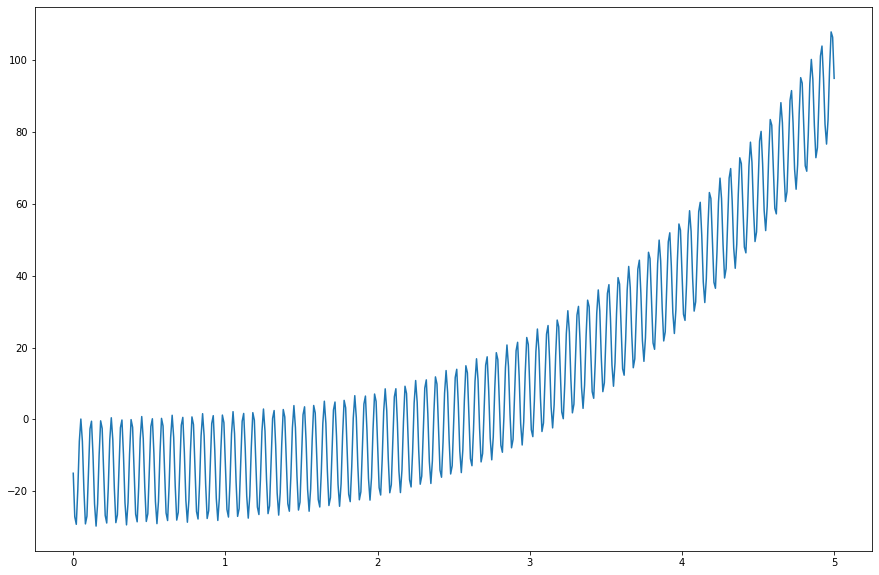

In [6]:
T = 5
y = np.fromfile('f11.txt', sep=' ')
X = np.linspace(0, T, len(y))
N = len(y)
plot_graph(X, y)

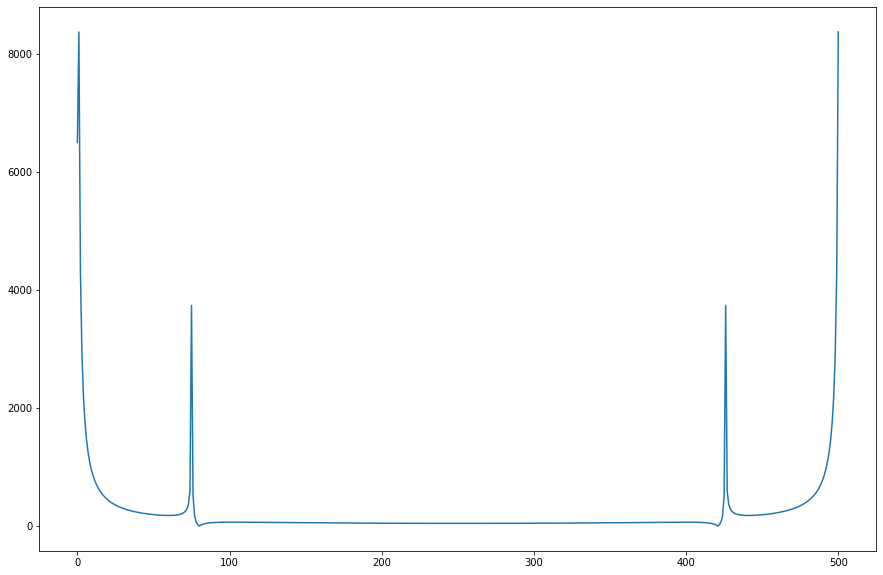

In [24]:
abs_ft = np.abs(np.fft.fft(y))
plot_graph(range(N), abs_ft)

In [22]:
abs_ft_half = abs_ft[:N // 2]

maximums, = np.where(np.logical_and.reduce(
 np.array([abs_ft_half > np.roll(abs_ft_half, i) for i in
chain(range(-1, 0), range(1, 2))]),
 axis=0
))

maximums = maximums[(maximums >= 5)]

In [10]:
f_max1 = maximums[0] / T
print(f_max1)

15.0


In [ ]:
Квадратична похибка:
(f(xi)-fi)^2
Мінімізуємо квадратичну похибку
((f(x1)-f1)^2)+...)'= 0

2(f(x1)-f1)*(x1^3) + .... = 0 |a1

2(f(x1)-f1)*(x1^2) + .... = 0 |a2

2(f(x1)-f1)*(x1) + .... = 0 |a3

2(f(x1)-f1)*(sin a4 f_max1) + .... = 0 |a4

2(f(x1)-f1) + .... = 0 |a5

In [12]:
def first_funk(xArr, fArr):
    a1 = 0;
    a2 = 0;
    a3 = 0;
    a4 = 0;
    a5 = 0;
    minus = 0;
    for x,f in zip(xArr, fArr):
        a1 += 2*pow(x, 6)
        a2 += 2*pow(x, 5)
        a3+=2*pow(x, 4)
        a4+=2*pow(x,3)*np.sin(2 * np.pi * f_max1 * x)
        a5+=2*pow(x,3)
        minus+=2*pow(x, 3)*f

    return [[a1, a2, a3, a4, a5], minus]

def second_funk(xArr, fArr):
    a1 = 0;
    a2 = 0;
    a3 = 0;
    a4 = 0;
    a5 = 0;
    minus = 0;
    for x,f in zip(xArr, fArr):
        a1 += 2*pow(x, 5)
        a2 += 2*pow(x, 4)
        a3+=2*pow(x, 3)
        a4+=2*pow(x,2)*np.sin(2 * np.pi * f_max1 * x)
        a5+=2*pow(x,2)
        minus+=2*pow(x,2)*f

    return [[a1, a2, a3, a4, a5], minus]

def third_funk(xArr, fArr):
    a1 = 0;
    a2 = 0;
    a3 = 0;
    a4 = 0;
    a5 = 0;
    minus = 0;
    for x,f in zip(xArr, fArr):
        a1 += 2*pow(x, 4)
        a2 += 2*pow(x, 3)
        a3+=2*pow(x, 2)
        a4+=2*pow(x,1)*np.sin(2 * np.pi * f_max1 * x)
        a5+=2*pow(x,1)
        minus+=2*pow(x,1)*f

    return [[a1, a2, a3, a4, a5],minus]

def fourth_funk(xArr, fArr):
    a1 = 0;
    a2 = 0;
    a3 = 0;
    a4 = 0;
    a5 = 0;
    minus = 0;
    for x,f in zip(xArr, fArr):
        a1 += 2*pow(x, 3) * np.sin(2 * np.pi * f_max1 * x)
        a2 += 2*pow(x, 2) * np.sin(2 * np.pi * f_max1 * x)
        a3+=2*pow(x, 1) * np.sin(2 * np.pi * f_max1 * x)
        a4+=2*np.sin(2 * np.pi * f_max1 * x) * np.sin(2 * np.pi * f_max1 * x)
        a5+=2 * np.sin(2 * np.pi * f_max1 * x)
        minus+=2*np.sin(2 * np.pi * f_max1 * x)*f

    return [[a1, a2, a3, a4, a5], minus]

def fifth_func(xArr, fArr):
    a1 = 0;
    a2 = 0;
    a3 = 0;
    a4 = 0;
    a5 = 0;
    minus = 0;
    for x,f in zip(xArr, fArr):
        a1 += 2*pow(x, 3)
        a2 += 2*pow(x, 2)
        a3+=2*pow(x, 1)
        a4+=2*np.sin(2 * np.pi * f_max1 * x)
        a5+=2
        minus+=2*f

    return [[a1, a2, a3, a4, a5], minus]

In [14]:
A = np.stack((
    first_funk(X,y)[0],
    second_funk(X,y)[0],
    third_funk(X,y)[0],
    fourth_funk(X,y)[0],
    fifth_func(X,y)[0]),
    axis=1
)

res = [
    first_funk(X,y)[1],
    second_funk(X,y)[1],
    third_funk(X,y)[1],
    fourth_funk(X,y)[1],
    fifth_func(X,y)[1]
]

print(A)
print(res)

[[ 2.24779911e+06  5.23963542e+05  1.25625833e+05 -2.45319171e+02
   3.13751250e+04]
 [ 5.23963542e+05  1.25625833e+05  3.13751250e+04 -4.90652626e+01
   8.35835000e+03]
 [ 1.25625833e+05  3.13751250e+04  8.35835000e+03 -9.81305253e+00
   2.50500000e+03]
 [-2.45319171e+02 -4.90652626e+01 -9.81305253e+00  5.00000000e+02
   3.71822669e-13]
 [ 3.13751250e+04  8.35835000e+03  2.50500000e+03  3.71822669e-13
   1.00200000e+03]]
[1508140.114532113, 336448.68048993306, 73539.60242610003, -7715.878093333481, 12996.774710000002]


In [ ]:
Розв'язємо рівняння і отримуємо коефіієнти

In [15]:
answ = np.linalg.solve(A, res)
tuple(answ.round(4))

(1.0, -1.0, 2.0, -15.0, -15.0)

In [ ]:
Підставляємо отримані коефіцінти у функцію, обчислюємо її значення:

In [20]:
func_approximated = np.vectorize(
 lambda t: answ[0] * t ** 3 + answ[1] * t ** 2 + answ[2] * t + answ[3] * np.sin(2 * np.pi *
f_max1 * t) + answ[4]
)
y_approximated = func_approximated(X)

In [ ]:
Обчислюємо квадратичну похибку функції

In [19]:
np.sum((y - y_approximated) ** 2)



3.3871870341908555e-07